<a href="https://colab.research.google.com/github/JustGosnell/Data-Science-Tools-and-Ecosystem-Lab/blob/main/Tesla_GameStop_Stock_vs_Revenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas yfinance requests beautifulsoup4 plotly

In [3]:
import pandas as pd
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go   # for dashboards/plots


In [4]:
# Question 1
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()   # first five rows


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [5]:

!pip install lxml html5lib beautifulsoup4

In [ ]:
# Question 2: Use Webscraping to Extract Tesla Revenue Data
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Question 2: Use Webscraping to Extract Tesla Revenue Data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Macrotrends stores tables with 'historical_data_table' class
tables = soup.find_all("table")

tesla_revenue = None
for table in tables:
    if "Revenue" in str(table):
        tesla_revenue = table
        break

# Extract rows
rows = tesla_revenue.find_all("tr")
data = []
for row in rows[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace(",", "").replace("$", "")
        if revenue != "":
            data.append([date, revenue])

# Create DataFrame
tesla_revenue_df = pd.DataFrame(data, columns=["Date", "Revenue"])

# Show last 5 rows
tesla_revenue_df.tail()




,Date,Revenue
11,2013,2013
12,2012,413
13,2011,204
14,2010,117
15,2009,112


In [6]:
# Question 3
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()   # first five rows


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [ ]:
#Question 4
import pandas as pd
import requests
from bs4 import BeautifulSoup

#Question 4
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Macrotrends tables usually have 'historical_data_table' class
tables = soup.find_all("table")

gme_revenue = None
for table in tables:
    if "Revenue" in str(table):
        gme_revenue = table
        break

# Extract table rows
rows = gme_revenue.find_all("tr")
data = []
for row in rows[1:]:  # skip header
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace(",", "").replace("$", "")
        if revenue != "":
            data.append([date, revenue])

# Create DataFrame
gme_revenue_df = pd.DataFrame(data, columns=["Date", "Revenue"])

# Show last 5 rows
gme_revenue_df.tail()

In [17]:
gme_rev = get_quarterly_revenue("GME","gamestop")
gme_rev.head()


Scrape failed: No revenue table in page.


RuntimeError: Could not obtain revenue for GME. Last error: HTTP Error 404: Not Found

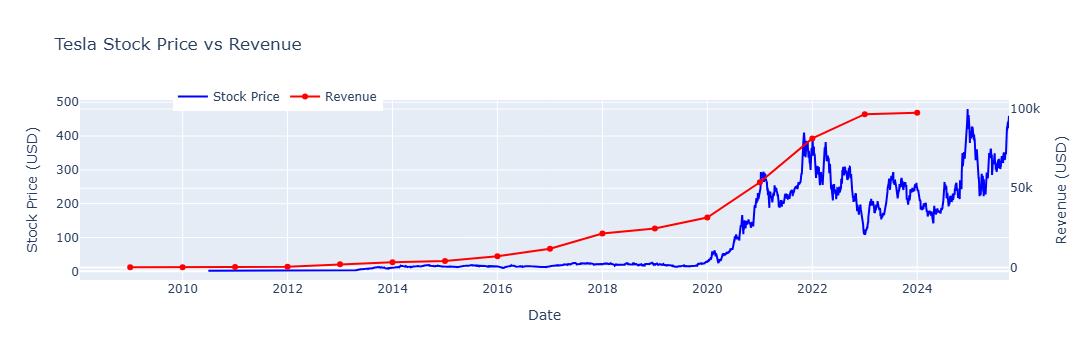

In [ ]:
#Question 5
import plotly.graph_objects as go

def make_graph(stock_data, revenue_data, title):
    fig = go.Figure()

    # Stock Prices trace (left y-axis)
    fig.add_trace(go.Scatter(
        x=stock_data['Date'],
        y=stock_data['Close'],
        name="Stock Price",
        line=dict(color='blue'),
        yaxis="y1"
    ))

    # Revenue trace (right y-axis)
    fig.add_trace(go.Scatter(
        x=revenue_data['Date'],
        y=revenue_data['Revenue'].astype(float),
        name="Revenue",
        line=dict(color='red'),
        yaxis="y2"
    ))

    # Layout with two y-axes
    fig.update_layout(
        title=title,
        xaxis=dict(title="Date"),
        yaxis=dict(title="Stock Price (USD)", side="left"),
        yaxis2=dict(title="Revenue (USD)", overlaying="y", side="right"),
        legend=dict(x=0.1, y=1.1, orientation="h")
    )

    fig.show()


make_graph(tesla_data, tesla_revenue_df, "Tesla Stock Price vs Revenue")


C:\Users\DELL\AppData\Local\Temp\ipykernel_19604\1664385398.py:7: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


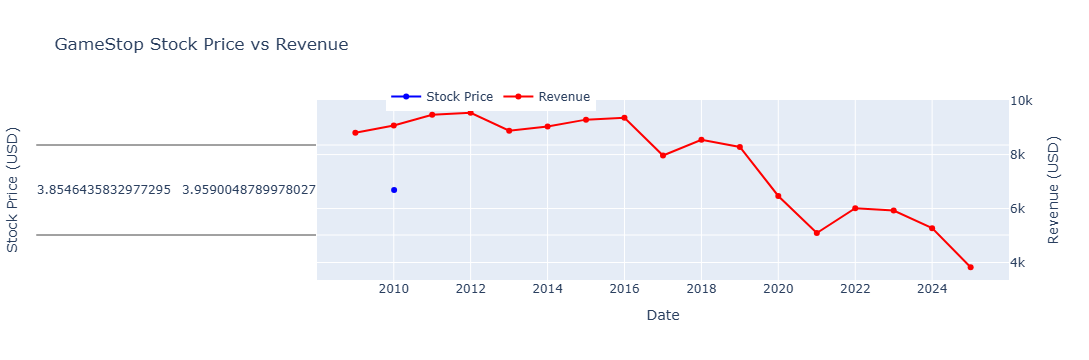

In [ ]:
#Question 6
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# Get GameStop stock data
gamestop_data = yf.download("GME", start="2010-01-01", end="2025-01-01")  # adjust dates if needed
gamestop_data.reset_index(inplace=True)

# Make sure gme_revenue_df exists from your Question 4
# It should already be defined like this:
# gme_revenue_df = pd.DataFrame(data, columns=["Date", "Revenue"])

# Plot the stock vs revenue
def make_graph(stock_data, revenue_data, title):
    fig = go.Figure()

    # Stock Prices trace (left y-axis)
    fig.add_trace(go.Scatter(
        x=stock_data['Date'],
        y=stock_data['Close'],
        name="Stock Price",
        line=dict(color='blue'),
        yaxis="y1"
    ))

    # Revenue trace (right y-axis)
    fig.add_trace(go.Scatter(
        x=revenue_data['Date'],
        y=revenue_data['Revenue'].astype(float),
        name="Revenue",
        line=dict(color='red'),
        yaxis="y2"
    ))

    # Layout with two y-axes
    fig.update_layout(
        title=title,
        xaxis=dict(title="Date"),
        yaxis=dict(title="Stock Price (USD)", side="left"),
        yaxis2=dict(title="Revenue (USD)", overlaying="y", side="right"),
        legend=dict(x=0.1, y=1.1, orientation="h")
    )

    fig.show()

#  Plot
make_graph(gamestop_data, gme_revenue_df, "GameStop Stock Price vs Revenue")
